# Selenium

In this notebook we will be using Selenium and python to scrape all the One Day International(ODI) matches played during 2000-2010 from [ESPN cricinfo]( https://www.espncricinfo.com/records/list-of-match-results-by-year-307851)

The following will be the prerequisites before going to the code
1. Install ChromeDriver from [Chrome Driver](https://chromedriver.chromium.org/downloads)
   Note:We will be using Chrome in this notebook, feel free to use driver of your comfort
2. Install any Pop-up blocker extension to prevent any hinderences during scrapping

In [1]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2023-05-26 06:24:00--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 108.177.97.190, 108.177.97.136, 108.177.97.93, ...
Connecting to dl.google.com (dl.google.com)|108.177.97.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-05-26 06:24:00 (41.6 MB/s) - ‘linux_signing_key.pub’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:4 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1075 B]
Get:5 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [445 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://security.u

In [2]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
--2023-05-26 06:24:29--  http://chromedriver.storage.googleapis.com/113.0.5672.63/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7315061 (7.0M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   6.98M  6.99MB/s    in 1.0s    

2023-05-26 06:24:30 (6.99 MB/s) - ‘/tmp/chromedriver.zip’ saved [7315061/7315061]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [3]:
# install selenium"
!sudo apt install -y python3-selenium
!pip install selenium==3.141.0 > /dev/null




The following additional packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 snapd
  squashfs-tools
Suggested packages:
  apparmor-profiles-extra apparmor-utils zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 python3-selenium
  snapd squashfs-tools
0 upgraded, 7 newly installed, 0 to remove and 17 not upgraded.
Need to get 38.7 MB of archives.
After this operation, 174 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 apparmor amd64 2.13.3-7ubuntu5.2 [502 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 liblzo2-2 amd64 2.10-2 [50.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 squashfs-tools amd64 1:4.4-1ubuntu0.3 [117 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 snapd amd64 2.58+20.04 [37.9 MB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 c

In [4]:
#Importing all necessaary Libraries

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

* Define the website to be scraped and path of the driver file (which was installed initially) in your local system
* Website can be reached by using get() method

In [5]:
website='https://www.espncricinfo.com/records/list-of-match-results-by-year-307851'
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)
#driver=webdriver.Chrome(path)
driver.get(website)

Defining Lists to store the scraped text

In [6]:
Team_1=[]
Team_2=[]
Ground=[]
Winner=[]
Margin=[]
Match_Date=[]

**1_step:** 
* After exploring the website to be scraped we can see the matches played in each year are stored in seprate links.
* We can find the element to be clicked to get to the data by inspecting and copying the XPATH of it.
* The copied path can be used as an Argument in 'find_element' method the get the element to be clicked
* Finally the difined element can clicked using '.click()' method

**2_step**:
* The code must pause till we reach the the wesite called. Time to be paused can be varied based on the website after playing around a few times.
* This is important as the scrapping may start before we reach the website

**3_step:**
* All the elements from the table can be extracted by passing 'tr' tag and 'By.TAG_NAME' as arguments to .find_elements() method

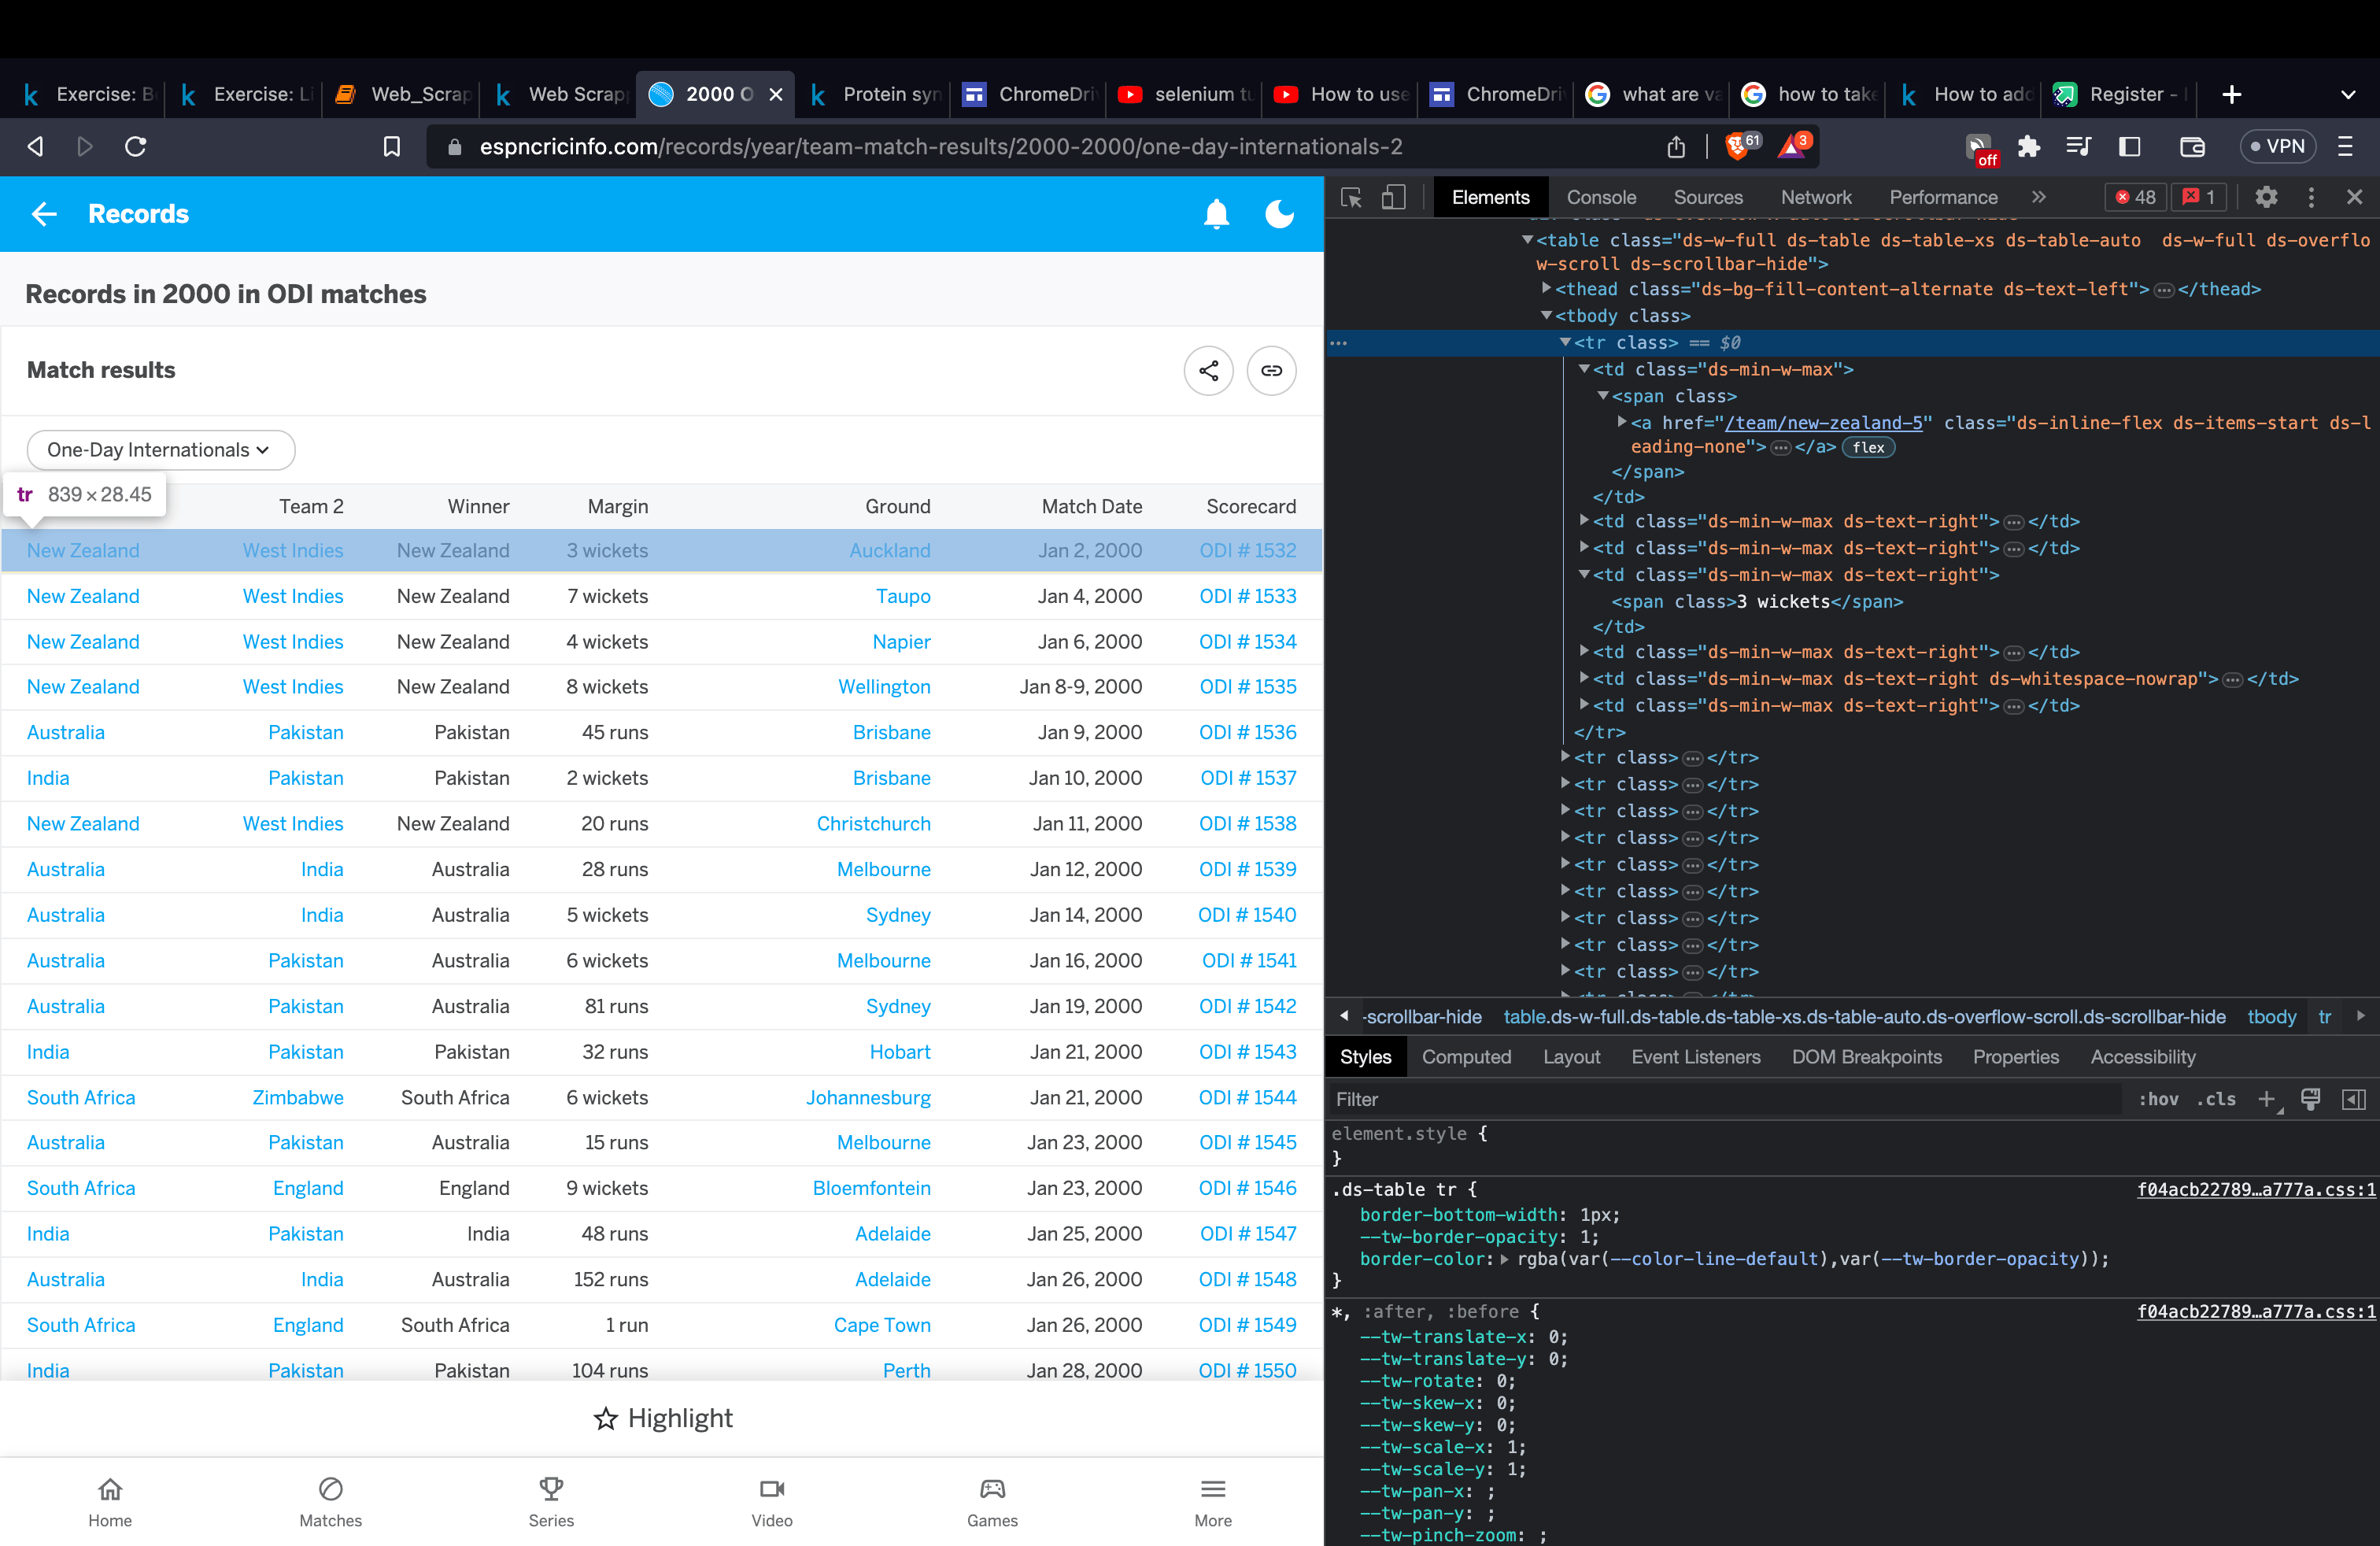



**4_step:**
* For each of the element extracted from the table we can get all the content for each element in the table using XPATH of the 'td' tag.

After inspecting all the content elements extracted above, we can find there are mainly two types of tags used, namely 'span' and 'a.

We will be following different methods to scrape from these tags.
1. * We directly extract the text from 'span' tag by extracting all the elements with 'TAG_NAME' span.
   * The first elements of each list are popped as even the headings (Winner,Margin,Match_Date) are extracted.
   
2. * Extracting text from these elements are different as they are tagged as 'href' links in 'a' tags
   * First the element in 'a' tag is extracted using XPATH.
   * From that element we can extract text by the same method used earlier where we used 'TAG_NAME'.
   
Printing the length of any list can be done to ensure there is consistent scrapping

**5_step:**
* As all the matches for the given year are scrapped we should return to the initial website
* By changing the XPATH of the element to be clicked we can get the website for the next year matches

In [7]:
for k in range(1,11):
    
#1_step
    element=driver.find_element(By.XPATH, '//*[@id="main-container"]/div[4]/div[1]/div[3]/div[1]/div[1]/div/div[4]/a[{}]/span'.format(k))
    element.click()
    
#2_step
    time.sleep(10)
    
#3_step
#Scrapping all the elements in a Table(<tr> tag)
    matches=driver.find_elements(By.TAG_NAME,'tr')

#4_step

#Scrapping each row from the elements extracted from the table(<td> tag)
    Winneri=[]
    Margini=[]
    Match_Datei=[]

    for i in matches:
            Winneri.append(i.find_element(By.XPATH,'./td[3]'))
            Margini.append(i.find_element(By.XPATH,'./td[4]'))
            Match_Datei.append(i.find_element(By.XPATH,'./td[6]'))

    Winneri.pop(0)
    Margini.pop(0)
    Match_Datei.pop(0)
    
    
#Extracting Text from <span> tag elements
    for i in Winneri:
            Winner.append(i.find_element(By.TAG_NAME,'span').text)
    for i in Margini:
            Margin.append(i.find_element(By.TAG_NAME,'span').text)
    for i in Match_Datei:
            Match_Date.append(i.find_element(By.TAG_NAME,'span').text)
    print(len(Margin))

    
    n=len(Winneri)


#Extracting Text from <a> tag elements
    for i in range(1,n+1):
            element = driver.find_element(By.XPATH,'//*[@id="main-container"]/div[4]/div[1]/div[3]/div[1]/div[1]/div/div[1]/div[2]/table/tbody/tr[{}]/td[1]/span/a'.format(i))
            text=element.find_element(By.TAG_NAME,'span').text
            Team_1.append(text)

    for i in range(1,n+1):
            element = driver.find_element(By.XPATH,'//*[@id="main-container"]/div[4]/div[1]/div[3]/div[1]/div[1]/div/div[1]/div[2]/table/tbody/tr[{}]/td[2]/span/a'.format(i))
            text=element.find_element(By.TAG_NAME,'span').text
            Team_2.append(text)

    for i in range(1,n+1):
            element = driver.find_element(By.XPATH,'//*[@id="main-container"]/div[4]/div[1]/div[3]/div[1]/div[1]/div/div[1]/div[2]/table/tbody/tr[{}]/td[5]/span/a'.format(i))
            text=element.find_element(By.TAG_NAME,'span').text
            Ground.append(text)
    print(len(Team_1))
    
    
 #5_step
    driver.get(website)
    time.sleep(15)
    print("done")


131
131
done
251
251
done
396
396
done
543
543
done
671
671
done
778
778
done
938
938
done
1129
1129
done
1255
1255
done
1405
1405
done


Dataframe is created using the lists created above

In [8]:
df=pd.DataFrame({'Team_1':Team_1,'Team_2':Team_2,'Winner':Winner,'Margin':Margin,'Ground':Ground,'Match Date':Match_Date})

In [9]:
df.to_csv('ODI.csv')

**You can find the dataset created here** [ODI](https://www.kaggle.com/datasets/gyaswanth297/odi-matches-dataset-2000-2010)